In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 

In [ ]:
import os
os.chdir("E:\Project")

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head(n=10)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [ ]:
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


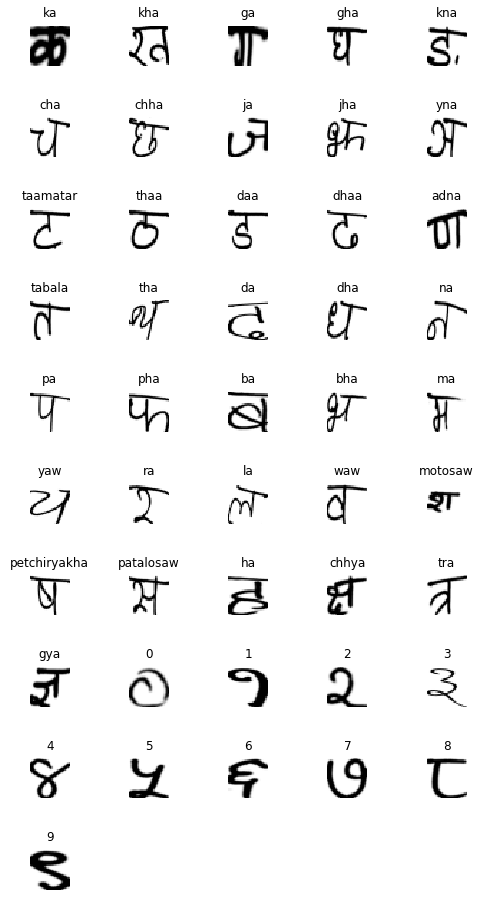

In [ ]:
char_names = data.character.unique()     #Returns the sorted unique elements of an array
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

In [ ]:
X = data.values[:,:-1]/255.0
Y = data["character"].values

In [ ]:
n_classes = 46

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
img_height_rows = 32
img_width_cols = 32

In [ ]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [ ]:

nb_units = 50

RNNmodel = Sequential()

RNNmodel.add(SimpleRNN(nb_units,
                    input_shape=(img_height_rows, img_width_cols),return_sequences=True))


RNNmodel.add(SimpleRNN(16,input_shape=(img_height_rows, img_width_cols),return_sequences=True))
RNNmodel.add(SimpleRNN(32))

RNNmodel.add(Dense(units=n_classes))
RNNmodel.add(Activation('softmax'))

RNNmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(RNNmodel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32, 50)            4150      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32, 16)            1072      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                1568      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                1518      
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 8,308
Trainable params: 8,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_trainRNN = np.reshape(x_train, (x_train.shape[0], 32, x_train.shape[1]))
X_testRNN = np.reshape(x_test, (x_test.shape[0], 32, x_test.shape[1]))

In [ ]:
RNNHistory = RNNmodel.fit(X_trainRNN,y_train,batch_size=32,epochs = 10,validation_data=(X_testRNN, y_test))

Train on 64400 samples, validate on 27600 samples
Epoch 1/10
64400/64400 [==============================] - 128s 2ms/step - loss: 1.8991 - acc: 0.4768 - val_loss: 1.7697 - val_acc: 0.5030
Epoch 2/10
64400/64400 [==============================] - 139s 2ms/step - loss: 1.6198 - acc: 0.5492 - val_loss: 1.5713 - val_acc: 0.5603
Epoch 3/10
64400/64400 [==============================] - 177s 3ms/step - loss: 1.4278 - acc: 0.5981 - val_loss: 1.3887 - val_acc: 0.6097
Epoch 4/10
64400/64400 [==============================] - 161s 2ms/step - loss: 1.3035 - acc: 0.6285 - val_loss: 1.2592 - val_acc: 0.6354
Epoch 5/10
64400/64400 [==============================] - 153s 2ms/step - loss: 1.2089 - acc: 0.6528 - val_loss: 1.2182 - val_acc: 0.6470
Epoch 6/10
64400/64400 [==============================] - 158s 2ms/step - loss: 1.1201 - acc: 0.6762 - val_loss: 1.2143 - val_acc: 0.6478
Epoch 7/10
64400/64400 [==============================] - 151s 2ms/step - loss: 1.0553 - acc: 0.6928 - val_loss: 1.1420 - 

In [ ]:
scores = RNNmodel.evaluate(X_testRNN, y_test, verbose=0)
print("RNN Model Accuracy: %.2f%%" % (scores[1]*100))

RNN Model Accuracy: 66.94%


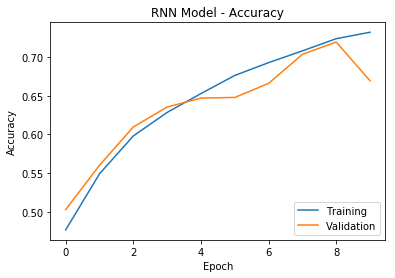

In [ ]:
print(RNNHistory)
fig1, ax_acc = plt.subplots()
plt.plot(RNNHistory.history['acc'])
plt.plot(RNNHistory.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

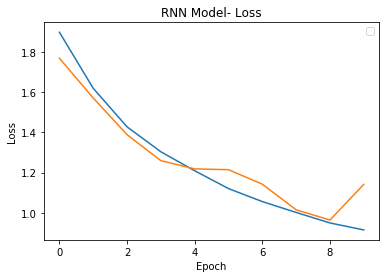

In [ ]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(RNNHistory.history['loss'])
plt.plot(RNNHistory.history['val_loss'])
plt.show()

In [ ]:

nb_units = 50

LSTMmodel = Sequential()

LSTMmodel.add(LSTM(nb_units,
                    input_shape=(img_height_rows, img_width_cols),return_sequences=True))

LSTMmodel.add(LSTM(16,input_shape=(img_height_rows, img_width_cols),return_sequences=True))
LSTMmodel.add(LSTM(32))

LSTMmodel.add(Dense(units=n_classes))
LSTMmodel.add(Activation('softmax'))

LSTMmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(LSTMmodel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 32, 50)            16600     
_________________________________________________________________
lstm_14 (LSTM)               (None, 32, 16)            4288      
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                6272      
_________________________________________________________________
dense_4 (Dense)              (None, 46)                1518      
_________________________________________________________________
activation_4 (Activation)    (None, 46)                0         
Total params: 28,678
Trainable params: 28,678
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_trainLSTM = np.reshape(x_train, (x_train.shape[0], 32, x_train.shape[1]))
X_testLSTM = np.reshape(x_test, (x_test.shape[0], 32, x_test.shape[1]))

In [ ]:
LSTMHistory = LSTMmodel.fit(X_trainLSTM,y_train,batch_size=32,epochs = 10,validation_data=(X_testLSTM, y_test))

Train on 64400 samples, validate on 27600 samples
Epoch 1/10
64400/64400 [==============================] - 548s 9ms/step - loss: 1.9670 - acc: 0.4757 - val_loss: 1.1165 - val_acc: 0.6922
Epoch 2/10
64400/64400 [==============================] - 387s 6ms/step - loss: 0.8836 - acc: 0.7517 - val_loss: 0.7025 - val_acc: 0.8011
Epoch 3/10
64400/64400 [==============================] - 381s 6ms/step - loss: 0.5821 - acc: 0.8350 - val_loss: 0.5195 - val_acc: 0.8505
Epoch 4/10
64400/64400 [==============================] - 695s 11ms/step - loss: 0.4294 - acc: 0.8776 - val_loss: 0.4325 - val_acc: 0.8762
Epoch 5/10
64400/64400 [==============================] - 397s 6ms/step - loss: 0.3435 - acc: 0.9001 - val_loss: 0.3515 - val_acc: 0.8966
Epoch 6/10
64400/64400 [==============================] - 344s 5ms/step - loss: 0.2870 - acc: 0.9155 - val_loss: 0.3082 - val_acc: 0.9124
Epoch 7/10
64400/64400 [==============================] - 343s 5ms/step - loss: 0.2405 - acc: 0.9294 - val_loss: 0.2686 -

In [ ]:
scores = LSTMmodel.evaluate(X_testLSTM, y_test, verbose=0)
print("LSTM Model Accuracy: %.2f%%" % (scores[1]*100))

LSTM Model Accuracy: 93.40%


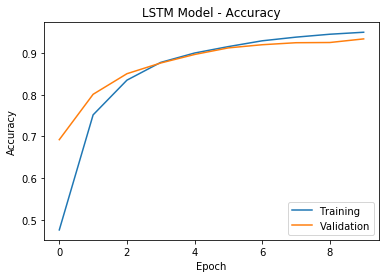

In [ ]:
print(LSTMHistory)
fig1, ax_acc = plt.subplots()
plt.plot(LSTMHistory.history['acc'])
plt.plot(LSTMHistory.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

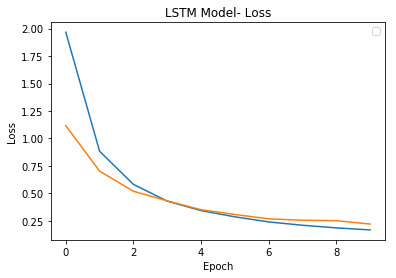

In [ ]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(LSTMHistory.history['loss'])
plt.plot(LSTMHistory.history['val_loss'])
plt.show()

In [ ]:
# Number of hidden units to use:
nb_units = 50

GRUmodel = Sequential()

GRUmodel.add(GRU(nb_units,
                    input_shape=(img_height_rows, img_width_cols),return_sequences=True))

GRUmodel.add(GRU(16,input_shape=(img_height_rows, img_width_cols),return_sequences=True))
GRUmodel.add(GRU(32))

GRUmodel.add(Dense(units=n_classes))
GRUmodel.add(Activation('softmax'))

GRUmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(GRUmodel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32, 50)            12450     
_________________________________________________________________
gru_2 (GRU)                  (None, 32, 16)            3216      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                4704      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                1518      
_________________________________________________________________
activation_6 (Activation)    (None, 46)                0         
Total params: 21,888
Trainable params: 21,888
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_trainGRU = np.reshape(x_train, (x_train.shape[0], 32, x_train.shape[1]))
X_testGRU = np.reshape(x_test, (x_test.shape[0], 32, x_test.shape[1]))

In [ ]:
GRUHistory = GRUmodel.fit(X_trainGRU,y_train,batch_size=32,epochs = 10,validation_data=(X_testGRU, y_test))

Train on 64400 samples, validate on 27600 samples
Epoch 1/10
64400/64400 [==============================] - 556s 9ms/step - loss: 2.0539 - acc: 0.4297 - val_loss: 1.2183 - val_acc: 0.6447
Epoch 2/10
64400/64400 [==============================] - 379s 6ms/step - loss: 0.8994 - acc: 0.7405 - val_loss: 0.6816 - val_acc: 0.8062
Epoch 3/10
64400/64400 [==============================] - 348s 5ms/step - loss: 0.5797 - acc: 0.8331 - val_loss: 0.5016 - val_acc: 0.8567
Epoch 4/10
64400/64400 [==============================] - 368s 6ms/step - loss: 0.4337 - acc: 0.8736 - val_loss: 0.4041 - val_acc: 0.8819
Epoch 5/10
64400/64400 [==============================] - 327s 5ms/step - loss: 0.3496 - acc: 0.8974 - val_loss: 0.3598 - val_acc: 0.8954
Epoch 6/10
64400/64400 [==============================] - 305s 5ms/step - loss: 0.2956 - acc: 0.9138 - val_loss: 0.3284 - val_acc: 0.9065
Epoch 7/10
64400/64400 [==============================] - 306s 5ms/step - loss: 0.2558 - acc: 0.9248 - val_loss: 0.2951 - 

C:\Users\dell\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247061). Check your callbacks.
  % delta_t_median)


64400/64400 [==============================] - 294s 5ms/step - loss: 0.2040 - acc: 0.9400 - val_loss: 0.2545 - val_acc: 0.9266
Epoch 10/10
64400/64400 [==============================] - 332s 5ms/step - loss: 0.1848 - acc: 0.9460 - val_loss: 0.2589 - val_acc: 0.9259


In [ ]:
scores = GRUmodel.evaluate(X_testGRU, y_test, verbose=0)
print("GRU Model Accuracy: %.2f%%" % (scores[1]*100))

GRU Model Accuracy: 92.59%


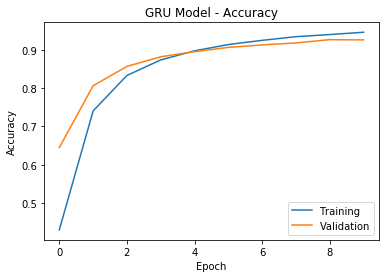

In [ ]:
print(GRUHistory)
fig1, ax_acc = plt.subplots()
plt.plot(GRUHistory.history['acc'])
plt.plot(GRUHistory.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('GRU Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

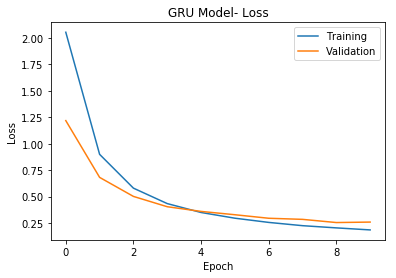

In [ ]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Model- Loss')
plt.plot(GRUHistory.history['loss'])
plt.plot(GRUHistory.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
CNNmodel = Sequential()

CNNmodel.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=im_shape))
CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
CNNmodel.add(Dropout(0.25))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(128, activation='relu'))
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Dense(64, activation='relu'))
CNNmodel.add(Dense(units=n_classes, activation='softmax', kernel_initializer='uniform'))
CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(CNNmodel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
__________

In [ ]:
CNNhistory = CNNmodel.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Train on 64400 samples, validate on 27600 samples
Epoch 1/10
64400/64400 [==============================] - 1435s 22ms/step - loss: 1.3949 - acc: 0.5809 - val_loss: 0.3948 - val_acc: 0.8878
Epoch 2/10
64400/64400 [==============================] - 1245s 19ms/step - loss: 0.7374 - acc: 0.7664 - val_loss: 0.2643 - val_acc: 0.9269
Epoch 3/10
64400/64400 [==============================] - 1342s 21ms/step - loss: 0.5626 - acc: 0.8205 - val_loss: 0.1915 - val_acc: 0.9447
Epoch 4/10
64400/64400 [==============================] - 1228s 19ms/step - loss: 0.4549 - acc: 0.8534 - val_loss: 0.1660 - val_acc: 0.9523
Epoch 5/10
64400/64400 [==============================] - 1438s 22ms/step - loss: 0.3967 - acc: 0.8730 - val_loss: 0.1415 - val_acc: 0.9583
Epoch 6/10
64400/64400 [==============================] - 1337s 21ms/step - loss: 0.3456 - acc: 0.8882 - val_loss: 0.1310 - val_acc: 0.9624
Epoch 7/10
64400/64400 [==============================] - 1304s 20ms/step - loss: 0.3068 - acc: 0.8993 - val_l

In [ ]:
scores = CNNmodel.evaluate(x_test, y_test, verbose=0)
print("CNN  ModelAccuracy: %.2f%%" % (scores[1]*100))

CNN  ModelAccuracy: 97.05%


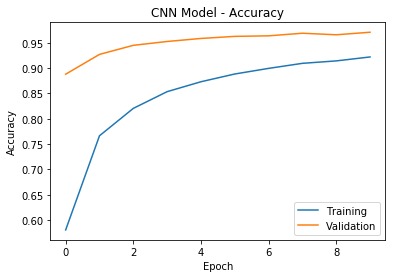

In [ ]:
# Accuracy
print(CNNhistory)
fig1, ax_acc = plt.subplots()
plt.plot(CNNhistory.history['acc'])
plt.plot(CNNhistory.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

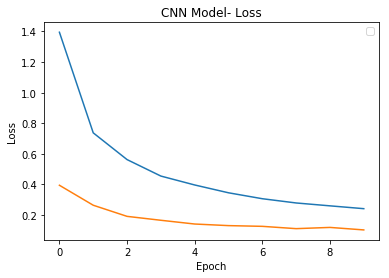

In [ ]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(CNNhistory.history['loss'])
plt.plot(CNNhistory.history['val_loss'])
plt.show()

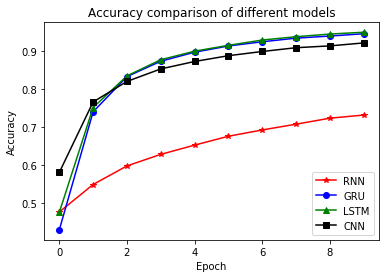

In [ ]:
plt.title('Accuracy comparison of different models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(RNNHistory.history['acc'],'r-*')
plt.plot(GRUHistory.history['acc'],'b-o')
plt.plot(LSTMHistory.history['acc'],'g-^')
plt.plot(CNNhistory.history['acc'],'k-s')
plt.legend(['RNN', 'GRU', 'LSTM', 'CNN'], loc='lower right')

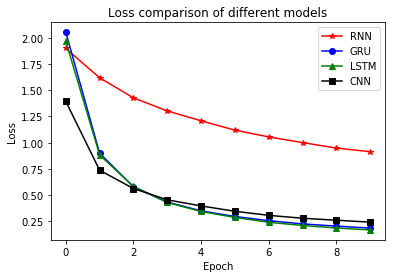

In [ ]:
plt.title('Loss comparison of different models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(RNNHistory.history['loss'],'r-*')
plt.plot(GRUHistory.history['loss'],'b-o')
plt.plot(LSTMHistory.history['loss'],'g-^')
plt.plot(CNNhistory.history['loss'],'k-s')
plt.legend(['RNN', 'GRU', 'LSTM', 'CNN'], loc='upper right')

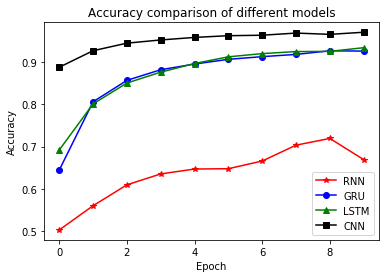

In [ ]:
plt.title('Accuracy comparison of different models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(RNNHistory.history['val_acc'],'r-*')
plt.plot(GRUHistory.history['val_acc'],'b-o')
plt.plot(LSTMHistory.history['val_acc'],'g-^')
plt.plot(CNNhistory.history['val_acc'],'k-s')
plt.legend(['RNN', 'GRU', 'LSTM', 'CNN'], loc='lower right')

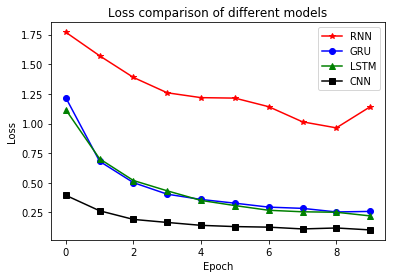

In [ ]:
plt.title('Loss comparison of different models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(RNNHistory.history['val_loss'],'r-*')
plt.plot(GRUHistory.history['val_loss'],'b-o')
plt.plot(LSTMHistory.history['val_loss'],'g-^')
plt.plot(CNNhistory.history['val_loss'],'k-s')
plt.legend(['RNN', 'GRU', 'LSTM', 'CNN'], loc='upper right')